In [1]:
import yfinance as yf 
import talib 
from datetime import datetime
from sklearn.model_selection import train_test_split

ticker = "NVO"
start_date = "2010-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date)
data.columns = data.columns.droplevel(1)

data['SMA20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA60'] = talib.EMA(data['Close'], timeperiod=60)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data["MACD"], data["MACD_SIGNAL"], data["MACD_HIST"] = talib.MACD(data["Close"])
data['BB_Low'], data['BB_Mid'], data['BB_High'] = talib.BBANDS(data["Close"], timeperiod=20)
data["ATR"] = talib.ATR(data['High'], data['Close'], data['Low'], timeperiod=14)
data["ADX"] = talib.ADX(data["High"], data["Low"], data["Close"], timeperiod=14)
data["OBV"] = talib.OBV(data["Close"], data["Volume"])

# Momentum Indicators
data['STOCH_K'], data['STOCH_D'] = talib.STOCH(
    data['High'], data['Low'], data['Close'],
    fastk_period=14,
    slowk_period=3, slowk_matype=0,
    slowd_period=3, slowd_matype=0
)

data['CCI_14'] = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['CCI_20'] = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=20)

data['WILLR_14'] = talib.WILLR(data['High'], data['Low'], data['Close'], timeperiod=14)

data['MOM_10'] = talib.MOM(data['Close'], timeperiod=10)
data['MOM_14'] = talib.MOM(data['Close'], timeperiod=14)

data['ROC_12'] = talib.ROC(data['Close'], timeperiod=12)

# Trend Strength Indicators
data['ADX_14'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
data['PLUS_DI'] = talib.PLUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['MINUS_DI'] = talib.MINUS_DI(data['High'], data['Low'], data['Close'], timeperiod=14)

data['AROONOSC_14'] = talib.AROONOSC(data['High'], data['Low'], timeperiod=14)

# Volume Indicators
data['OBV'] = talib.OBV(data['Close'], data['Volume'])

data['MFI_14'] = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)

data['AD'] = talib.AD(data['High'], data['Low'], data['Close'], data['Volume'])

data['ADOSC'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], 
                            fastperiod=3, slowperiod=10)

# Other
data['SAR'] = talib.SAR(data['High'], data['Low'], acceleration=0.02, maximum=0.2)

data['NATR_14'] = talib.NATR(data['High'], data['Low'], data['Close'], timeperiod=14)


data['Daily_Return'] = data['Close'].pct_change()
data['nxt_ret'] = data['Daily_Return'].shift(periods=-1)
data = data.dropna()

threshold = 0
data.loc[data['nxt_ret'] >= threshold, 'label'] = 1
data.loc[data['nxt_ret'] < threshold, 'label'] = -1

/var/folders/n3/kjpx2ctx5mb_d1p6ntdrl7hr0000gn/T/ipykernel_88774/2407822009.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'NVO Heatmap')

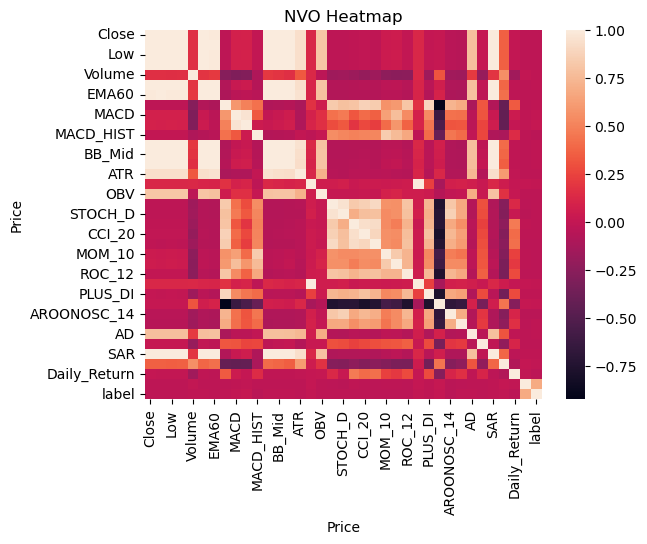

In [3]:
import seaborn as sns 

heatmap = sns.heatmap(data.corr(),annot=False)
heatmap.set_title(f'{ticker} Heatmap')

In [4]:
data.head()

Price,Close,High,Low,Open,Volume,SMA20,EMA60,RSI,MACD,MACD_SIGNAL,...,MINUS_DI,AROONOSC_14,MFI_14,AD,ADOSC,SAR,NATR_14,Daily_Return,nxt_ret,label
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-30,5.737484,5.790217,5.733771,5.783533,1933000,5.590469,5.212489,66.492144,0.153048,0.150842,...,18.532908,71.428571,57.568541,2.006943e+07,-1.462524e+06,5.923164,1.510854,-0.012527,-0.001683,-1.0
2010-03-31,5.727829,5.781305,5.726344,5.763480,2246000,5.612194,5.229386,65.480737,0.144521,0.149577,...,18.298825,71.428571,55.555745,1.794483e+07,-2.164951e+06,5.919376,1.473839,-0.001683,0.013874,1.0
2010-04-01,5.807300,5.808043,5.762737,5.770907,1168000,5.638221,5.248334,69.581888,0.142532,0.148168,...,17.049148,64.285714,54.845960,1.907452e+07,-1.896047e+06,5.911655,1.448498,0.013874,0.010743,1.0
2010-04-05,5.869688,5.911280,5.779819,5.779819,3292000,5.662407,5.268706,72.358322,0.144327,0.147400,...,15.215207,57.142857,60.991722,2.028344e+07,-1.229017e+06,5.726344,1.490713,0.010743,0.011388,1.0
2010-04-06,5.936533,5.941732,5.872659,5.886771,1269000,5.687455,5.290602,74.992149,0.149421,0.147804,...,14.306932,100.000000,60.062687,2.136141e+07,-5.014221e+05,5.730042,1.455331,0.011388,-0.004254,-1.0


In [5]:
x_col = ['SMA20', 'EMA60', 'RSI', 'MACD', 'MACD_SIGNAL', "MACD_HIST", "BB_Low", "BB_Mid", "BB_High", "ATR", "ADX", "OBV", "Daily_Return"]
y_col = 'label'

In [6]:
# na check
data.isna().sum()

Price
Close           0
High            0
Low             0
Open            0
Volume          0
SMA20           0
EMA60           0
RSI             0
MACD            0
MACD_SIGNAL     0
MACD_HIST       0
BB_Low          0
BB_Mid          0
BB_High         0
ATR             0
ADX             0
OBV             0
STOCH_K         0
STOCH_D         0
CCI_14          0
CCI_20          0
WILLR_14        0
MOM_10          0
MOM_14          0
ROC_12          0
ADX_14          0
PLUS_DI         0
MINUS_DI        0
AROONOSC_14     0
MFI_14          0
AD              0
ADOSC           0
SAR             0
NATR_14         0
Daily_Return    0
nxt_ret         0
label           0
dtype: int64

In [7]:
X = data[x_col]
y = data[y_col] 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")

Decision Tree Accuracy: 0.5177065767284992


In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"KNN Train Set Accuracy: {accuracy_score(y_train, y_pred_train)}")

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
y_pred_train = gbm.predict(X_train)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Gradient Boosting Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Logistic Regression Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

random = RandomForestClassifier(n_estimators=30,max_depth=5)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
y_pred_train = random.predict(X_train)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"SVM Train Accuracy: {accuracy_score(y_train, y_pred_train)}")

KNN Accuracy: 0.5016863406408094
KNN Train Set Accuracy: 0.6229211858279103
Gradient Boosting Accuracy: 0.5261382799325464
Gradient Boosting Train Accuracy: 0.7194504699927693
Logistic Regression Accuracy: 0.5219224283305227
Logistic Regression Train Accuracy: 0.5289226319595083
Random Forest Accuracy: 0.5185497470489039
Random Forest Train Accuracy: 0.6366594360086768
SVM Accuracy: 0.5219224283305227
SVM Train Accuracy: 0.5289226319595083


In [11]:
# tree algo
import pandas as pd
df = pd.DataFrame({'name':x_col, 'impo':random.feature_importances_})

df

,name,impo
0,SMA20,0.060627
1,EMA60,0.063615
2,RSI,0.075143
3,MACD,0.083369
4,MACD_SIGNAL,0.097569
5,MACD_HIST,0.088260
6,BB_Low,0.088403
7,BB_Mid,0.066343
8,BB_High,0.043423
9,ATR,0.070351


In [12]:
y_train_xgboost = y_train.replace(-1, 0)
y_train_xgboost

Date
2018-04-02    1.0
2024-06-13    1.0
2022-11-21    1.0
2010-09-07    1.0
2019-06-18    1.0
             ... 
2014-09-24    0.0
2015-05-20    1.0
2013-08-28    0.0
2024-03-06    1.0
2022-11-04    1.0
Name: label, Length: 2766, dtype: float64

In [13]:
y_test_xgboost = y_test.replace(-1, 0)

In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train, y_train_xgboost)
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
print(f"XGBoost (Binary) Test Set Prediction: {accuracy_score(y_test_xgboost, y_pred)}")
print(f"XGBoost (Binary) Train Set Prediction: {accuracy_score(y_train, y_train_pred)}")

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train_xgboost)
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
print(f"XGBoost (n_estimator) Test Set Prediction: {accuracy_score(y_test_xgboost, y_pred)}")
print(f"XGBoost (n_estimator) Train Set Prediction: {accuracy_score(y_train, y_train_pred)}")

XGBoost (Binary) Test Set Prediction: 0.5042158516020236
XGBoost (Binary) Train Set Prediction: 0.5285610990600145
XGBoost (n_estimator) Test Set Prediction: 0.5042158516020236
XGBoost (n_estimator) Train Set Prediction: 0.5285610990600145


In [15]:
# get more features (ta-lib)
# feature importance -> delete 
# S&P, rival company, friends company (which is same industry) stock price 